## Exercise 30

#### Lab Experiment

###### a)

Ansatz: 
$
    f(\Psi) = a_1 \cos\Psi + a_2 \sin\Psi
$

design matrix: 
$\underline{\underline{\mathrm{A}}} = 
\begin{pmatrix}
    1.00000000e+00 & 0.00000000e+00\\
   8.66025404e-01 & 5.00000000e-01\\
  5.00000000e-01&  8.66025404e-01\\
    6.12323400e-17 & 1.00000000e+00\\
   -5.00000000e-01 & 8.66025404e-01\\
   -8.66025404e-01 & 5.00000000e-01\\
   -1.00000000e+00 & 1.22464680e-16\\
   -8.66025404e-01 &-5.00000000e-01\\
   -5.00000000e-01 &-8.66025404e-01\\
   -1.83697020e-16 &-1.00000000e+00\\
    5.00000000e-01 &-8.66025404e-01\\
    8.66025404e-01 &-5.00000000e-01
\end{pmatrix}
$

In [42]:
import numpy as np
from numpy.linalg import pinv
import uncertainties as unc
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt

psi = [0,30,60,90,120,150,180,210,240,270,300,330]
psi = np.multiply(psi,2*np.pi/360)
asymetry = [-0.032, 0.010,0.057,0.068, 0.076, 0.080, 0.031,0.005,-0.041,-0.090,-0.088,-0.074]
# calculating design matrix
A = np.array([np.cos(psi),np.sin(psi)]).transpose()
AT = A.transpose()
print("design matrix A = ")
print(A)

#calculating the a-vector
a = (pinv(AT @ A) @ AT) @ asymetry
print("a =",a)

design matrix A = 
[[ 1.00000000e+00  0.00000000e+00]
 [ 8.66025404e-01  5.00000000e-01]
 [ 5.00000000e-01  8.66025404e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-5.00000000e-01  8.66025404e-01]
 [-8.66025404e-01  5.00000000e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-8.66025404e-01 -5.00000000e-01]
 [-5.00000000e-01 -8.66025404e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 5.00000000e-01 -8.66025404e-01]
 [ 8.66025404e-01 -5.00000000e-01]]
a = [-0.0375063   0.07739978]


The resulting solution vector a is $\vec{a} = (-0.0375063,0.07739978)^T$

### b)
Calculate the covariance matrix $V[a]$ as well as the errors of $𝑎_1$ and $𝑎_2$ and the correlation coefficient

covariance matrix of a: 
 [[ 2.01666667e-05  4.14289297e-21]
 [-1.60179413e-21  2.01666667e-05]]
Error of a_1=  0.004490731195102493
Error of a_2=  0.004490731195102492
correlation coefficient: rho =  2.0543270915397328e-16


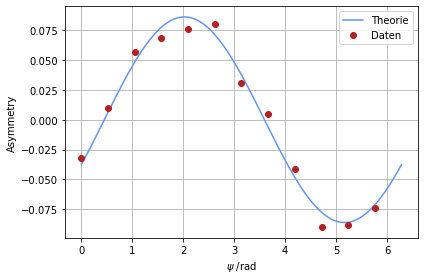

In [46]:
#covariance matrix of asymetry
Var_y = V = np.diag([0.011**2]*12)

#covariance matrix of the parameters
Cov_a = pinv(AT@A)@AT@Var_y@A@pinv(AT@A)
print("covariance matrix of a: \n",Cov_a)

#calculating the errors of the parameters
error1 = np.sqrt(Cov_a[0][0])
error2 = np.sqrt(Cov_a[1][1])
print("Error of a_1= ",error1)
print("Error of a_2= ",error2)

#calculating correlation coefficient of a'_1 and a_2:
rho = Cov_a[0][1]/(error1*error2)
print("correlation coefficient: rho = ", rho)

#plotting the results
xi = np.linspace(0,2*np.pi,1000)
plt.plot(xi,a[0]*np.cos(xi)+a[1]*np.sin(xi),label = "Theorie",color = "cornflowerblue")
plt.plot(psi,asymetry,marker="o",linewidth = 0,label = "Daten",color = "firebrick")
plt.legend()
plt.grid()
plt.xlabel("$\psi \,\,/$rad")
plt.ylabel("Asymmetry")
plt.tight_layout()

The covariance matrix of $\vec{a} = \begin{pmatrix}
2.01666667e-05 & 3.84715287e-21\\
-1.58839835e-21 & 2.01666667e-05
\end{pmatrix}$. \\
The parameters with errors are $a_1 = -0.0375063 \pm 0.00449$ and $a_2 = 0.07739978 \pm 0.00449$ with a correlation coefficient of $\rho = 1.907679110142422e-16$.


### c)
Calculate $A_0$ and $\delta$, their error, and the correlation of $a_1$ and $a_2$.

The resulting ansatz is given by: 
 f(psi) =  -0.086+/-0.004 * cos(psi 1.12+/-0.05 )


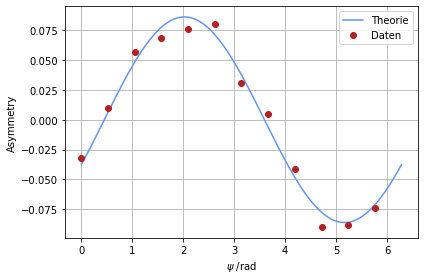

In [47]:
import uncertainties as unc
from uncertainties import unumpy as unp
#A_0 and delta
a_1_err = unc.ufloat(a[0],error1)
a_2_err = unc.ufloat(a[1],error2)

A_0 = -unp.sqrt(a_1_err**2+a_2_err**2)
delta = unp.arctan(-(a_2_err)/(a_1_err))

print("The resulting ansatz is given by: \n","f(psi) = ", A_0,"* cos(psi",delta,")")

#plotting the results
xi = np.linspace(0,2*np.pi,1000)
plt.plot(xi,unp.nominal_values(A_0)*np.cos(xi+unp.nominal_values(delta)),label = "Theorie",color = "cornflowerblue")
plt.plot(psi,asymetry,marker="o",linewidth = 0,label = "Daten",color = "firebrick")
plt.legend()
plt.grid()
plt.xlabel("$\psi \,\,/$rad")
plt.ylabel("Asymmetry")
plt.tight_layout()